In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
0,22,2143,0,0,1,3,21,404,416,240,42352,6.675781,10.265625,4.335938,5.902344,6.199219,4.796791,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0,1.0
1,22,1735,0,2,0,3,8,381,416,240,42352,5.032227,3.699219,4.316406,6.855469,5.257812,1.416102,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0,1.0
2,22,1971,0,0,0,0,8,460,416,240,42352,6.368164,4.906250,4.277344,9.050781,7.238281,3.615565,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0,1.0
3,22,2473,0,0,0,18,20,421,416,240,42352,8.407227,6.640625,5.996094,14.675781,6.316406,13.150191,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0,1.0
4,22,1093,0,0,1,3,8,167,416,240,42352,3.575195,7.531250,4.894531,0.191406,1.683594,8.104800,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,37,66,16,1,1,9,1,3,2560,1600,11781038,0.835938,0.000000,0.000000,3.343750,0.000000,2.096375,1.432617,2.401367,6.652771,4.125000,13.437500,95.484375,975.058594,18704.0,18283.0,1.0
15996,37,100,32,0,0,18,2,8,2560,1600,11781038,2.132812,5.187500,1.843750,1.500000,0.000000,3.591003,2.844727,5.889648,15.255798,3.687500,0.000000,203.964844,0.000000,41738.0,37212.0,1.0
15997,37,141,16,1,0,0,4,15,2560,1600,11781038,4.184570,8.687500,4.937500,0.000000,3.113281,9.875392,7.579102,9.038086,50.865349,8.375000,16.375000,221.734375,816.109375,20642.0,17046.0,1.0
15998,37,335,16,0,2,6,2,38,2560,1600,11781038,10.111328,7.234375,6.269531,3.304688,23.636719,63.075695,21.457031,34.392578,310.964172,9.218750,29.843750,120.170898,1610.256836,125078.0,146935.0,1.0


In [5]:
cols = df.columns

In [6]:
for c in cols:
    print(c,': ',df[c].nunique())

quality :  4
bits :  2106
intra_parts :  15
skip_parts :  5
inter_16x16_parts :  5
inter_4x4_parts :  12
inter_other_parts :  28
non_zero_pixels :  568
frame_width :  4
frame_height :  4
movement_level :  205
mean :  6599
sub_mean_1 :  3123
sub_mean_2 :  3022
sub_mean_3 :  3072
sub_mean_4 :  2975
var_sub_blocks :  11457
sobel_h :  9908
sobel_v :  9896
variance :  12001
block_movement_h :  2368
block_movement_v :  2221
var_movement_h :  8427
var_movement_v :  8450
cost_1 :  14378
cost_2 :  14538
relevant :  2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 27 columns):
quality              16000 non-null int64
bits                 16000 non-null int64
intra_parts          16000 non-null int64
skip_parts           16000 non-null int64
inter_16x16_parts    16000 non-null int64
inter_4x4_parts      16000 non-null int64
inter_other_parts    16000 non-null int64
non_zero_pixels      16000 non-null int64
frame_width          16000 non-null int64
frame_height         16000 non-null int64
movement_level       16000 non-null int64
mean                 16000 non-null float64
sub_mean_1           16000 non-null float64
sub_mean_2           16000 non-null float64
sub_mean_3           15986 non-null float64
sub_mean_4           16000 non-null float64
var_sub_blocks       16000 non-null float64
sobel_h              16000 non-null float64
sobel_v              16000 non-null float64
variance             16000 non-null float64
block_movement_h     16000 non-nu

In [8]:
df.describe()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,15986.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,15983.000000,15998.000000
mean,29.500000,449.837312,11.040000,0.849187,0.995437,1.978687,3.686437,74.087125,1432.000000,850.000000,4.034132e+06,3.467034,3.145166,2.951684,3.034862,2.849105,6.554618,8.027763,8.271249,53.332864,8.023825,6.797076,841.948320,491.913447,36948.640625,42059.829569,0.822353
std,5.590345,549.338243,19.050616,1.181855,1.018507,3.901610,4.446710,102.640728,851.904548,530.205215,4.447082e+06,30.278011,4.518314,4.251154,4.424255,4.090572,19.752055,9.184907,9.552508,107.265796,17.259731,11.552299,3815.230446,2404.069505,38631.383338,43844.708679,0.382227
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,416.000000,240.000000,3.164500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,728.000000,420.000000,2.338548e+05,0.335938,0.000000,0.000000,0.000000,0.000000,0.115791,0.897705,0.943359,1.424867,0.500000,0.500000,0.687500,0.746094,9916.750000,10965.000000,1.000000
50%,29.500000,243.000000,0.000000,0.000000,1.000000,0.000000,2.000000,33.000000,1376.000000,780.000000,1.704902e+06,1.870605,1.500000,1.437500,1.437500,1.335938,1.349894,5.171387,5.313477,14.525076,2.625000,3.210938,11.683594,19.527344,23051.500000,26135.000000,1.000000
75%,33.250000,622.000000,16.000000,1.000000,2.000000,3.000000,6.000000,100.000000,2080.000000,1210.000000,7.608813e+06,4.364258,4.536132,4.316406,4.424804,4.102539,5.393014,11.629883,11.776611,52.498296,7.062500,8.062500,94.025574,96.064392,52071.250000,59876.500000,1.000000
max,37.000000,4771.000000,64.000000,4.000000,4.000000,33.000000,27.000000,828.000000,2560.000000,1600.000000,1.227660e+07,2191.377930,80.000000,76.203125,49.039062,38.675781,1123.011597,69.706055,66.775391,2022.197998,322.093750,189.000000,194634.750000,68389.359375,425705.000000,446306.000000,1.000000


In [9]:
df[df['relevant'] == 1].shape

(13156, 27)

In [10]:
df[df['relevant'] == 0].shape

(2842, 27)

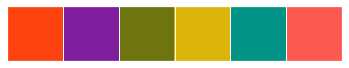

In [11]:
sns.set(rc={'figure.figsize':(9,6)})
colors = ["orangered", "purple", "olive", "gold", "teal","coral"]
mypalette = sns.xkcd_palette(colors)
sns.palplot(sns.xkcd_palette(colors))
sns.set_palette(mypalette, 6)

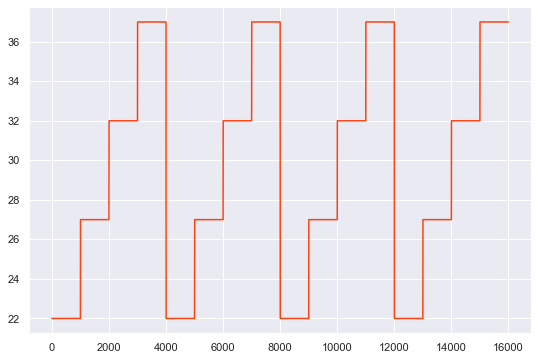

In [12]:
plt.plot(df['quality'])

Text(0.5, 1.0, 'Bits and Cost_2')

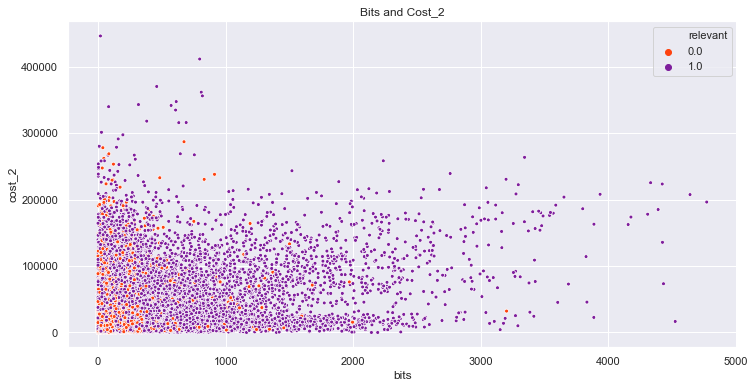

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df,x='bits',y='cost_2',hue='relevant',s=15)
ax.set_title('Bits and Cost_2')
#fig.savefig('bitscost2.png')

In [14]:
corr = df.corr()

In [15]:
corr[corr>0.9]

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
quality,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bits,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.984354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intra_parts,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skip_parts,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inter_16x16_parts,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inter_4x4_parts,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inter_other_parts,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_zero_pixels,NaN,0.984354,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frame_width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.996333,0.944759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frame_height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996333,1.000000,0.964464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## MIssing Values

In [16]:
df.isnull().sum()

quality               0
bits                  0
intra_parts           0
skip_parts            0
inter_16x16_parts     0
inter_4x4_parts       0
inter_other_parts     0
non_zero_pixels       0
frame_width           0
frame_height          0
movement_level        0
mean                  0
sub_mean_1            0
sub_mean_2            0
sub_mean_3           14
sub_mean_4            0
var_sub_blocks        0
sobel_h               0
sobel_v               0
variance              0
block_movement_h      0
block_movement_v      0
var_movement_h        0
var_movement_v        0
cost_1                0
cost_2               17
relevant              2
dtype: int64

#### The sub_mean_3 can be calculated from the other sum_means and the mean

In [17]:
df[['mean','sub_mean_1','sub_mean_2','sub_mean_3','sub_mean_4']]

,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4
0,6.675781,10.265625,4.335938,5.902344,6.199219
1,5.032227,3.699219,4.316406,6.855469,5.257812
2,6.368164,4.906250,4.277344,9.050781,7.238281
3,8.407227,6.640625,5.996094,14.675781,6.316406
4,3.575195,7.531250,4.894531,0.191406,1.683594
...,...,...,...,...,...
15995,0.835938,0.000000,0.000000,3.343750,0.000000
15996,2.132812,5.187500,1.843750,1.500000,0.000000
15997,4.184570,8.687500,4.937500,0.000000,3.113281
15998,10.111328,7.234375,6.269531,3.304688,23.636719


In [18]:
for i in range(df.shape[0]):
    if not pd.notnull(df['sub_mean_3'][i]):
        df.at[i, 'sub_mean_3'] = 4*df['mean'][i] - df['sub_mean_1'][i] - df['sub_mean_2'][i] - df['sub_mean_4'][i]

#### The cost_1 and cost_2 stay close to each other cost_2 can be imputed with cost_1 values

In [19]:
df[['cost_1','cost_2']]

,cost_1,cost_2
0,0.0,0.0
1,8816.0,8801.0
2,5104.0,5193.0
3,21531.0,19802.0
4,15073.0,14549.0
...,...,...
15995,18704.0,18283.0
15996,41738.0,37212.0
15997,20642.0,17046.0
15998,125078.0,146935.0


In [20]:
for i in range(df.shape[0]):
    if not pd.notnull(df['cost_2'][i]):
        df.at[i, 'cost_2'] = df['cost_1'][i]

#### Just 2 values missing from relevant, we can delete them 

In [21]:
df = df[df['relevant'].notna()]

In [22]:
df.isnull().sum()

quality              0
bits                 0
intra_parts          0
skip_parts           0
inter_16x16_parts    0
inter_4x4_parts      0
inter_other_parts    0
non_zero_pixels      0
frame_width          0
frame_height         0
movement_level       0
mean                 0
sub_mean_1           0
sub_mean_2           0
sub_mean_3           0
sub_mean_4           0
var_sub_blocks       0
sobel_h              0
sobel_v              0
variance             0
block_movement_h     0
block_movement_v     0
var_movement_h       0
var_movement_v       0
cost_1               0
cost_2               0
relevant             0
dtype: int64

## PCA

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Normalization

In [24]:
df_train = df.drop(['relevant'],1)

In [25]:
standard = 1
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)

### 2D

With MinMax Normalization

In [26]:
pca = PCA(n_components=2)
pca_comps = pca.fit_transform(df_train)
df_pca = pd.DataFrame(data = pca_comps
             , columns = ['x', 'y'])

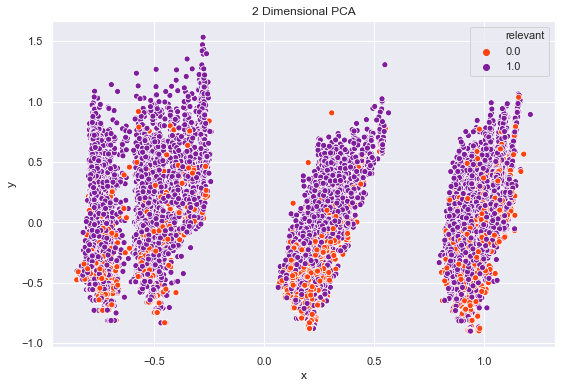

In [27]:
ax = plt.subplot()
ax.set_title('2 Dimensional PCA')
sns.scatterplot(data=df_pca, x='x', y='y', hue=df['relevant'])
#plt.savefig('pca_out_cosine_stand.png')

### Feature Importance 

With MinMax Normalization

In [28]:
comp = abs( pca.components_ )
print(comp)
cols = df.columns
i = np.argmax(comp[0])
print('Feature in the first component:',cols[i])
j = np.argmax(comp[1])
print('Feature in the second component:',cols[j])

[[1.65884443e-02 2.34454416e-02 1.95192455e-01 3.91562758e-02
  9.61892275e-02 3.78290257e-02 8.73889423e-02 2.59518969e-02
  5.78793337e-01 5.71902007e-01 5.22202626e-01 6.74710668e-05
  6.30763784e-03 1.00066435e-02 1.39490281e-02 1.52477035e-02
  2.57536035e-03 3.02172180e-02 2.80499582e-02 7.24390867e-03
  1.27387002e-02 1.99279868e-02 3.70816664e-03 1.14545331e-02
  3.49195266e-02 3.91046361e-02]
 [6.75589834e-01 2.04246171e-01 2.97139726e-01 4.65043684e-01
  1.28519587e-01 7.53758784e-02 1.68991240e-01 2.11543872e-01
  6.08208418e-02 4.80320510e-02 2.24548028e-02 2.75090575e-03
  5.75780329e-02 5.80968923e-02 9.47472559e-02 1.14328708e-01
  6.37060176e-03 1.73267585e-01 1.85919092e-01 3.81065994e-02
  1.01335912e-02 1.78785404e-02 1.57311371e-03 4.67291535e-03
  2.75712793e-03 2.33603225e-03]]
Feature in the first component: frame_width
Feature in the second component: quality


### 3D

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [ ]:
colors = ["orangered", "purple"]#, "olive", "gold", "teal","coral"]

With MinMax Normalization

In [30]:
pca = PCA(n_components=3)
pca_comps_train = pca.fit_transform(df_train)
df_pca_train = pd.DataFrame(data = pca_comps_train
             , columns = ['x', 'y', 'z'])

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_train['x'], df_pca_train['y'], df_pca_train['z'], c=df['relevant'], s=1,cmap=ListedColormap(colors))

In [ ]:
fig.savefig('pca3.png')

### Feature Importance 

With MinMax Normalization

In [31]:
comp = abs( pca.components_ )
print(comp)
cols = df.columns
i = np.argmax(comp[0])
print('Feature in the first component:',cols[i])
j = np.argmax(comp[1])
print('Feature in the second component:',cols[j])
k = np.argmax(comp[2])
print('Feature in the third component:',cols[k])

[[1.65884443e-02 2.34454416e-02 1.95192455e-01 3.91562758e-02
  9.61892275e-02 3.78290257e-02 8.73889423e-02 2.59518969e-02
  5.78793337e-01 5.71902007e-01 5.22202626e-01 6.74710668e-05
  6.30763784e-03 1.00066435e-02 1.39490281e-02 1.52477035e-02
  2.57536035e-03 3.02172180e-02 2.80499582e-02 7.24390867e-03
  1.27387002e-02 1.99279868e-02 3.70816664e-03 1.14545331e-02
  3.49195266e-02 3.91046361e-02]
 [6.75589834e-01 2.04246171e-01 2.97139726e-01 4.65043684e-01
  1.28519587e-01 7.53758784e-02 1.68991240e-01 2.11543872e-01
  6.08208418e-02 4.80320510e-02 2.24548028e-02 2.75090575e-03
  5.75780329e-02 5.80968922e-02 9.47472559e-02 1.14328708e-01
  6.37060176e-03 1.73267585e-01 1.85919092e-01 3.81065994e-02
  1.01335913e-02 1.78785404e-02 1.57311374e-03 4.67291534e-03
  2.75712793e-03 2.33603224e-03]
 [6.26590621e-01 3.58065797e-02 5.58845254e-01 2.57970590e-01
  1.33028794e-01 3.65765726e-02 7.81030712e-02 2.52699867e-02
  7.46384343e-02 5.38863846e-02 8.15179602e-02 2.39143503e-03
  7.

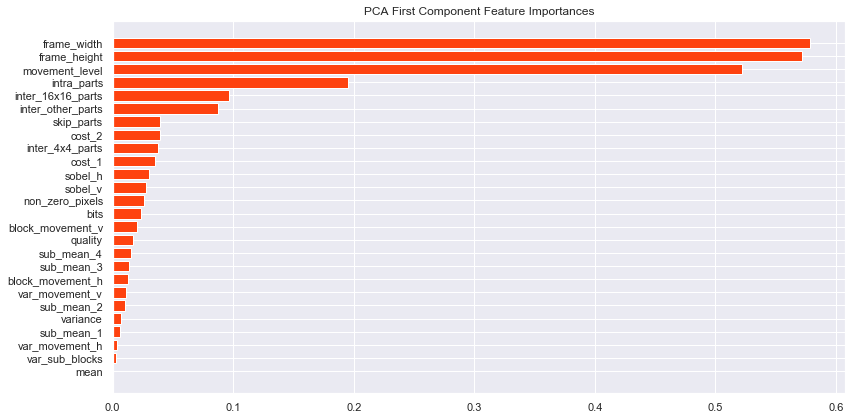

In [33]:
features_to_display = 26
sorted_idx = comp[0].argsort()[-features_to_display:]
fig, ax = plt.subplots(figsize=(12, 6))
y_ticks = np.arange(0, features_to_display)
ax.barh(y_ticks, comp[0][sorted_idx])
ax.set_yticklabels(cols[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("PCA First Component Feature Importances")

fig.tight_layout()
plt.show()
fig.savefig('firstcomp.png')

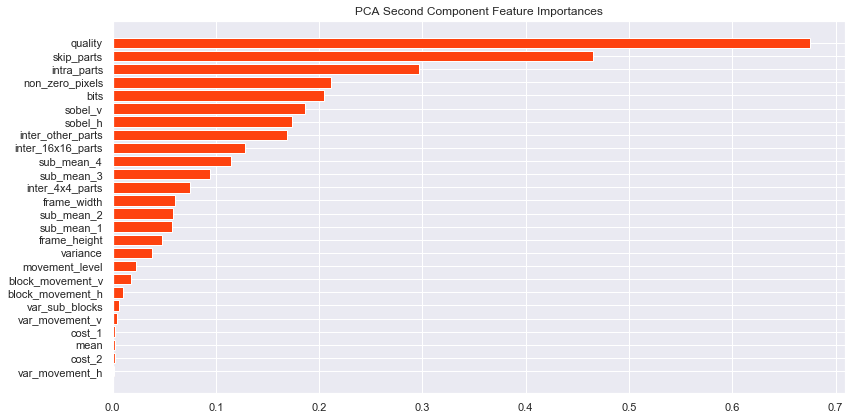

In [37]:
features_to_display = 26
sorted_idx = comp[1].argsort()[-features_to_display:]
fig, ax = plt.subplots(figsize=(12, 6))
y_ticks = np.arange(0, features_to_display)
ax.barh(y_ticks, comp[1][sorted_idx])
ax.set_yticklabels(cols[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("PCA Second Component Feature Importances")

fig.tight_layout()
plt.show()
fig.savefig('secondcomp.png')

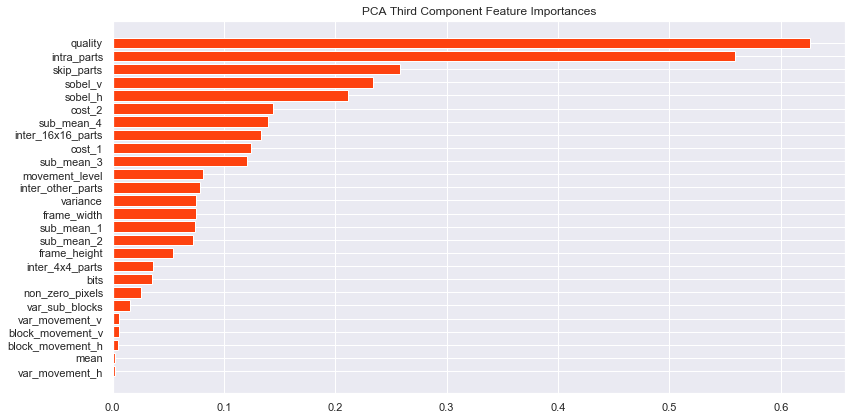

In [38]:
features_to_display = 26
sorted_idx = comp[2].argsort()[-features_to_display:]
fig, ax = plt.subplots(figsize=(12, 6))
y_ticks = np.arange(0, features_to_display)
ax.barh(y_ticks, comp[2][sorted_idx])
ax.set_yticklabels(cols[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("PCA Third Component Feature Importances")

fig.tight_layout()
plt.show()
fig.savefig('thirdcomp.png')

In [45]:
df['quality'].unique()

array([22, 27, 32, 37], dtype=int64)

In [76]:
irrelevant = df[df['relevant'] == 0]
irrelevant['quality'].value_counts(normalize=True)

37    0.456017
32    0.281140
27    0.173118
22    0.089726
Name: quality, dtype: float64

In [75]:
relevant = df[df['relevant'] == 1]
relevant['quality'].value_counts(normalize=True)

22    0.284509
27    0.266646
32    0.243311
37    0.205534
Name: quality, dtype: float64

In [43]:
relevant

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
0,22,2143,0,0,1,3,21,404,416,240,42352,6.675781,10.265625,4.335938,5.902344,6.199219,4.796791,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0,1.0
1,22,1735,0,2,0,3,8,381,416,240,42352,5.032227,3.699219,4.316406,6.855469,5.257812,1.416102,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0,1.0
2,22,1971,0,0,0,0,8,460,416,240,42352,6.368164,4.906250,4.277344,9.050781,7.238281,3.615565,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0,1.0
3,22,2473,0,0,0,18,20,421,416,240,42352,8.407227,6.640625,5.996094,14.675781,6.316406,13.150191,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0,1.0
4,22,1093,0,0,1,3,8,167,416,240,42352,3.575195,7.531250,4.894531,0.191406,1.683594,8.104800,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,37,66,16,1,1,9,1,3,2560,1600,11781038,0.835938,0.000000,0.000000,3.343750,0.000000,2.096375,1.432617,2.401367,6.652771,4.125000,13.437500,95.484375,975.058594,18704.0,18283.0,1.0
15996,37,100,32,0,0,18,2,8,2560,1600,11781038,2.132812,5.187500,1.843750,1.500000,0.000000,3.591003,2.844727,5.889648,15.255798,3.687500,0.000000,203.964844,0.000000,41738.0,37212.0,1.0
15997,37,141,16,1,0,0,4,15,2560,1600,11781038,4.184570,8.687500,4.937500,0.000000,3.113281,9.875392,7.579102,9.038086,50.865349,8.375000,16.375000,221.734375,816.109375,20642.0,17046.0,1.0
15998,37,335,16,0,2,6,2,38,2560,1600,11781038,10.111328,7.234375,6.269531,3.304688,23.636719,63.075695,21.457031,34.392578,310.964172,9.218750,29.843750,120.170898,1610.256836,125078.0,146935.0,1.0


# CSV

In [ ]:
df.to_csv('data_prep.csv', index=False)